As part of my IBM Course Data Analytics I did the class Data Visualization with Python. The material presented here was part of the final exam, and I am presenting it to you here. You can find the course here: https://www.coursera.org/learn/python-for-data-visualization.

### Importing Required Libraries



In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium


# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The month end date of sales observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period. This variable represents the seasonal effect on automobile sales for a given month. In the automobile industry, sales often fluctuate throughout the year due to seasonal patterns—for example, sales may increase during the festive season or year-end promotions, and decrease during off-peak months like post-holiday winter periods.
A value greater than 1 indicates higher-than-average sales expected for that month due to seasonal trends (e.g., holiday season or new model launches).
A value less than 1 suggests lower-than-average sales due to seasonal slowdowns.
A value around 1 means the season has neutral or average effect on sales.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


In [ ]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/d51iMGfp_t0QpO30Lym-dw/automobile-sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Raise an error if the request failed
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Print confirmation
print('Data downloaded and read into a dataframe!')

# Optional: Show the first few rows of the dataframe
print(df.head())

In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000,2112.000000
mean,2001.520833,0.224432,101.210890,0.737756,41469.506155,2879.743655,6.118845,40.205748,-0.237074,2.441525,3164.160511
std,12.535031,0.417306,10.634092,0.286092,21388.409141,1175.338324,1.964292,16.291271,0.859691,1.108472,3640.137399
min,1980.000000,0.000000,73.900000,0.250000,15001.000000,494.200000,3.000000,12.510000,-4.230000,1.000000,40.000000
25%,1991.000000,0.000000,94.060000,0.500000,22039.000000,1872.000000,4.000000,27.210000,-0.570000,1.600000,923.000000
50%,2002.000000,0.000000,100.800000,0.810000,34957.500000,2883.500000,6.000000,39.420000,-0.005000,2.300000,2381.500000
75%,2012.000000,0.000000,108.320000,0.940000,57418.250000,3902.425000,8.000000,53.862500,0.392500,2.900000,4363.500000
max,2023.000000,1.000000,131.670000,1.500000,79998.000000,4983.000000,9.000000,70.370000,0.820000,6.000000,65645.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how Average automobile sales fluctuate from year to year


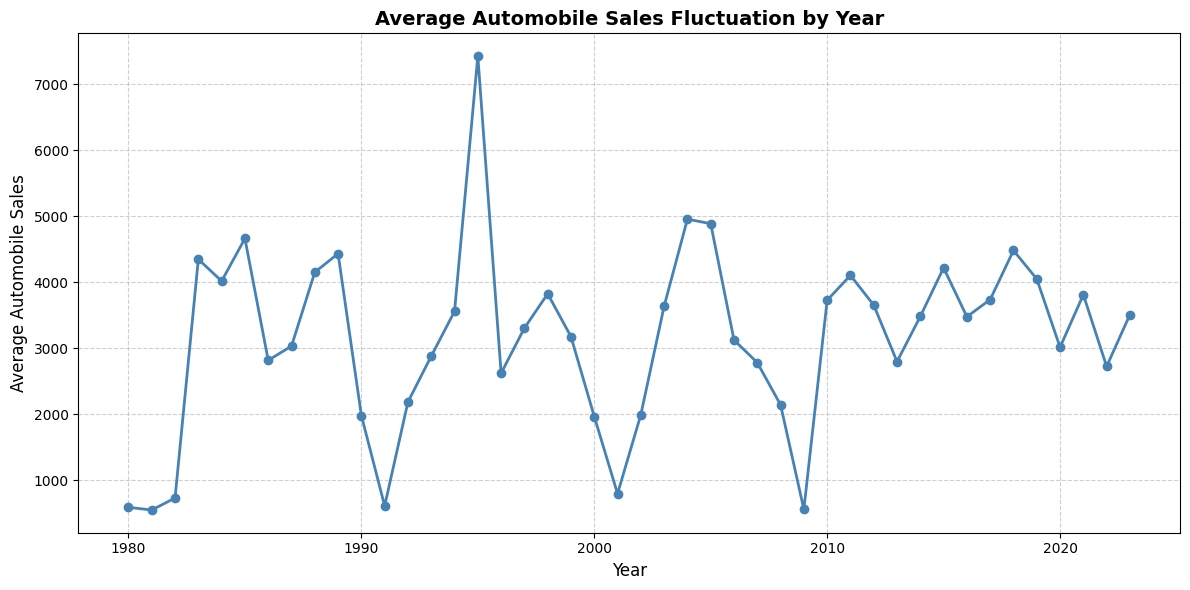

In [ ]:
# Calculate average automobile sales by year
yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

yearly_sales.plot(kind='line', ax=ax, marker='o', color='steelblue', linewidth=2, markersize=6)

ax.set_title('Average Automobile Sales Fluctuation by Year', fontsize=14, fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Average Automobile Sales', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


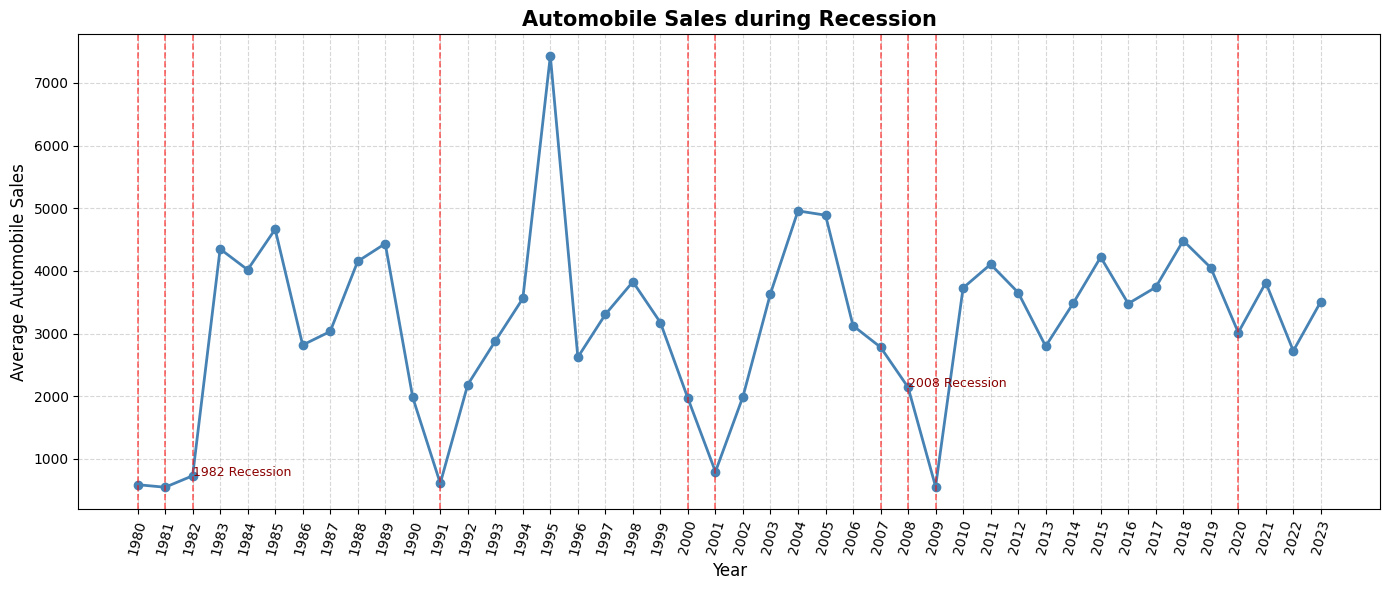

In [ ]:
list(range(1980-203))

yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()

# Identify recession years
recession_years = df[df['Recession'] == 1]['Year'].unique()


# Plot
fig, ax = plt.subplots(figsize=(14, 6))

yearly_sales.plot(kind='line', ax=ax, marker='o', color='steelblue', linewidth=2, markersize=6)

# Highlight recession years with vertical spans
for year in recession_years:
    ax.axvline(x=year, color='red', linestyle='--', alpha=0.6, linewidth=1.2)

# X-axis ticks for all years from 1980 to 2023
plt.xticks(range(1980, 2024), rotation=75)

# Annotate at least two recession years using plt.text
plt.text(1982, yearly_sales[1982], '1982 Recession', fontsize=9, color='darkred')
plt.text(2008, yearly_sales[2008], '2008 Recession', fontsize=9, color='darkred')

plt.title('Automobile Sales during Recession', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Automobile Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


---



####  TASK 1.2: How do trends in advertising expenditure correlate with automobile sales during non-recession periods, and what insights can be derived from this relationship.


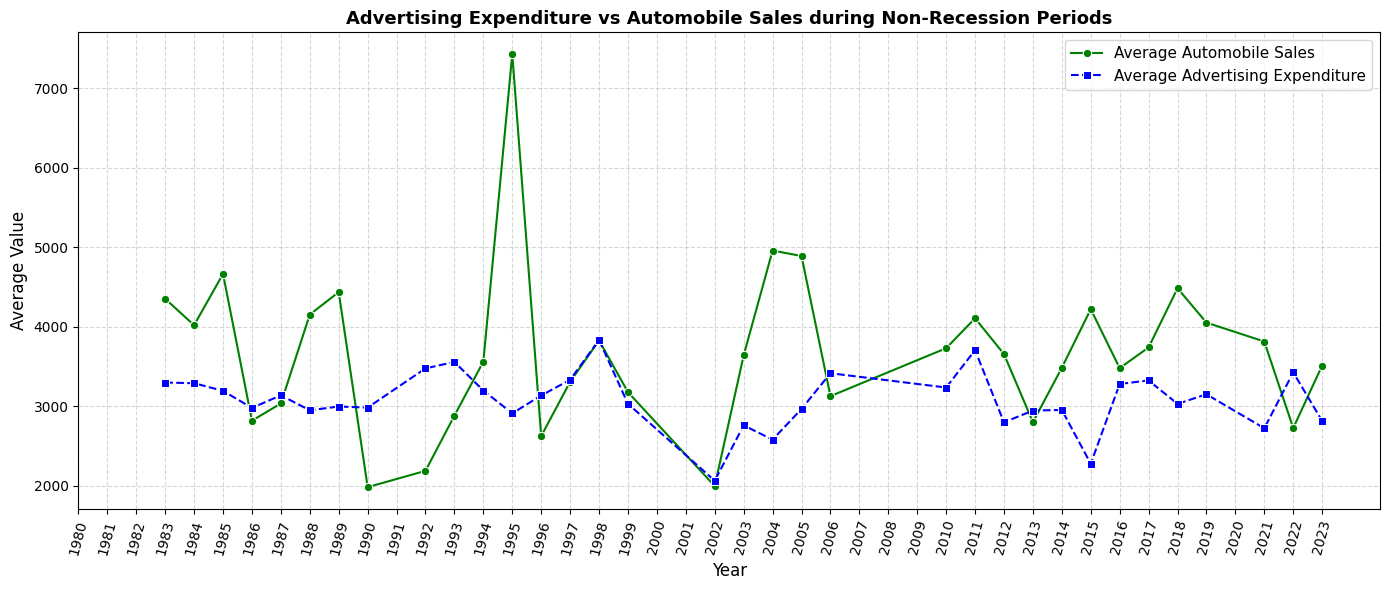

In [ ]:
# Filter non-recession periods
non_recession_df = df[df['Recession'] == 0]

# Group by Year and calculate averages
yearly_data = non_recession_df.groupby('Year')[['Automobile_Sales', 'Advertising_Expenditure']].mean().reset_index()

# Plot
fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=yearly_data, x='Year', y='Automobile_Sales',
             label='Average Automobile Sales',
             color='green', linestyle='-', marker='o', ax=ax)

sns.lineplot(data=yearly_data, x='Year', y='Advertising_Expenditure',
             label='Average Advertising Expenditure',
             color='blue', linestyle='--', marker='s', ax=ax)

plt.xticks(range(1980, 2024), rotation=75)

plt.title('Advertising Expenditure vs Automobile Sales during Non-Recession Periods',
          fontsize=13, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


C:\Users\T1M\AppData\Local\Temp\ipykernel_23116\2490453512.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recession',y='Automobile_Sales', data = average_sales,


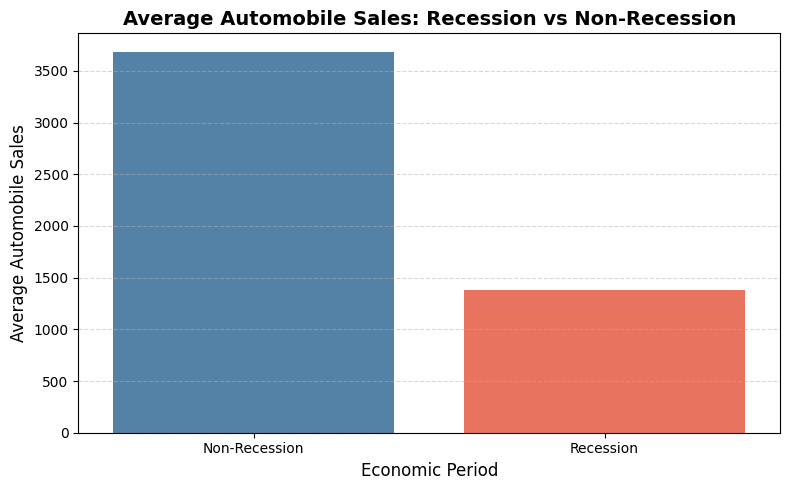

In [ ]:
# Group by Recession and calculate average Automobile_Sales
average_sales = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()


average_sales['Recession'] = average_sales['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

# plot

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x='Recession',y='Automobile_Sales', data = average_sales,
            palette={'Non-Recession': 'steelblue', 'Recession': 'tomato'}, ax=ax)

ax.set_title('Average Automobile Sales: Recession vs Non-Recession',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Economic Period', fontsize=12)
ax.set_ylabel('Average Automobile Sales', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period



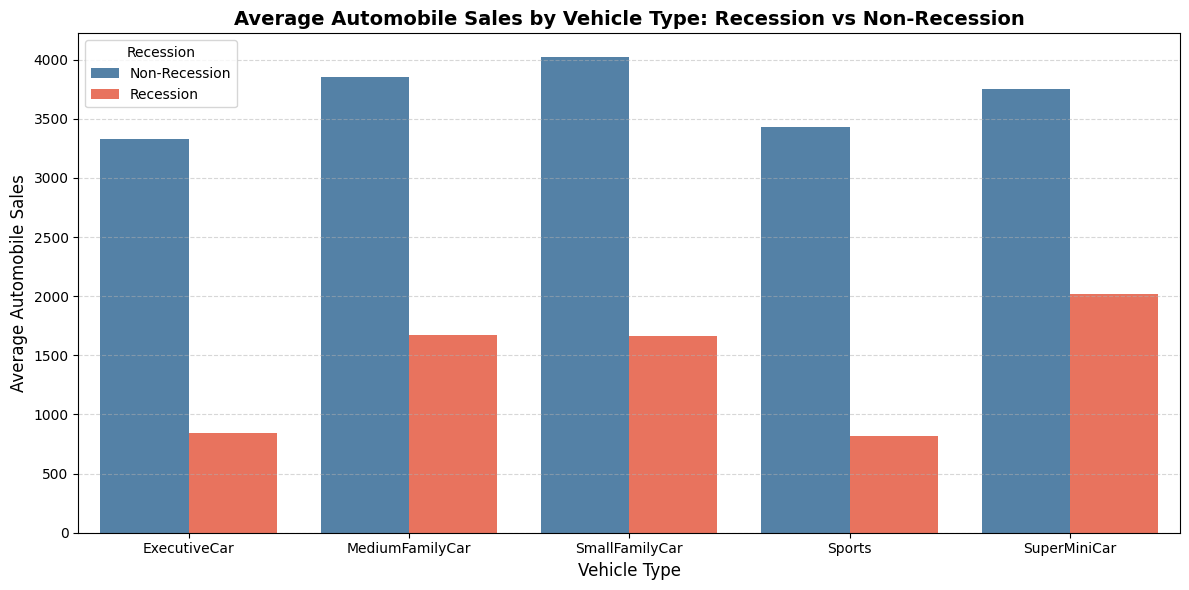

In [ ]:
# Group by Recession and Vehicle_Type for average Automobile_Sales
vehicle_sales = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()


vehicle_sales['Recession'] = vehicle_sales['Recession'].map({0: 'Non-Recession', 1: 'Recession'})

# plot

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='Vehicle_Type',y='Automobile_Sales', hue='Recession', data = vehicle_sales,
            palette={'Non-Recession': 'steelblue', 'Recession': 'tomato'}, ax=ax)

ax.set_title('Average Automobile Sales by Vehicle Type: Recession vs Non-Recession',
             fontsize=14, fontweight='bold')
ax.set_xlabel('Vehicle Type', fontsize=12)
ax.set_ylabel('Average Automobile Sales', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


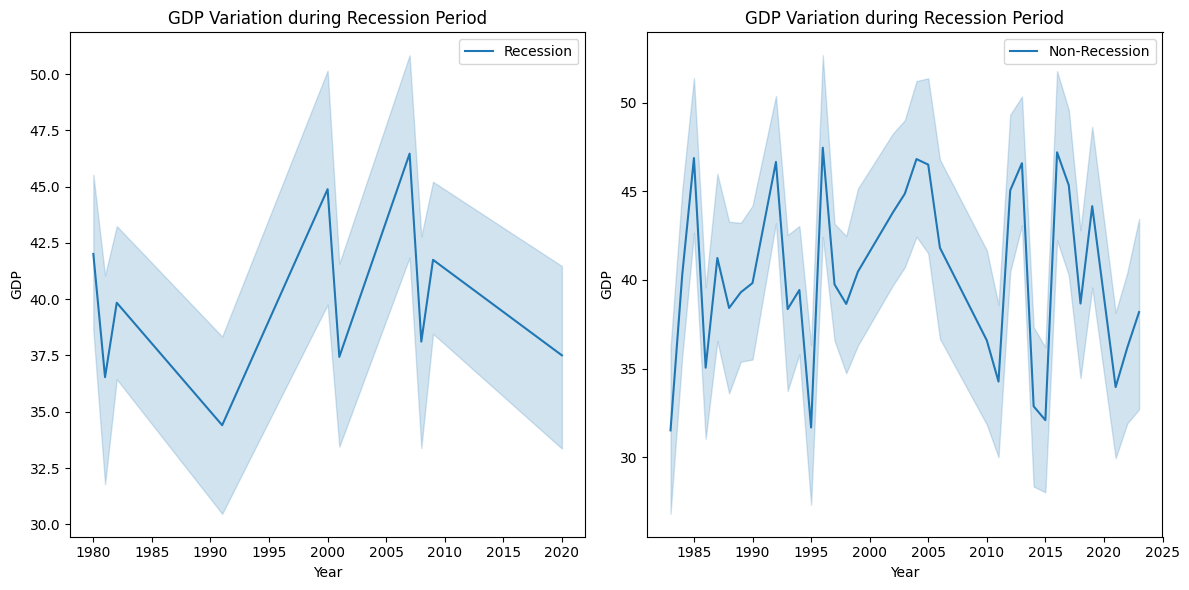

In [ ]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
    
#Figure
fig=plt.figure(figsize=(12, 6))
    
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2)  
    
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
    
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Recession Period')
    
plt.tight_layout()
plt.show()

---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'


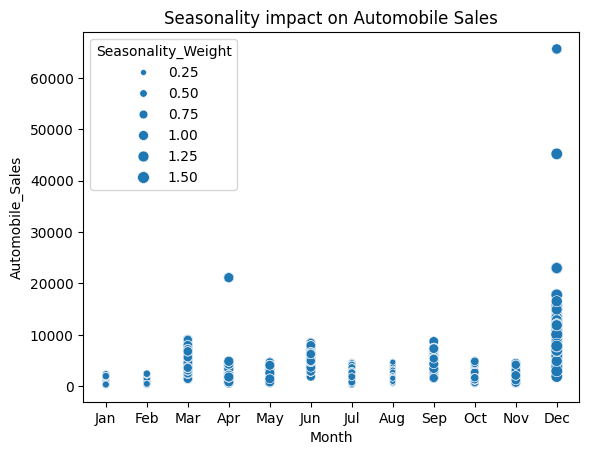

In [ ]:
non_rec_data = df[df['Recession'] == 0]
    
size=non_rec_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
    
#you can further include hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()


---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the relationship between consumer confidence and automobile sales during recessions.
 #### From the data, develop a scatter plot to identify the relationship between consumer confidence and automobile sales during recession periods.
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'


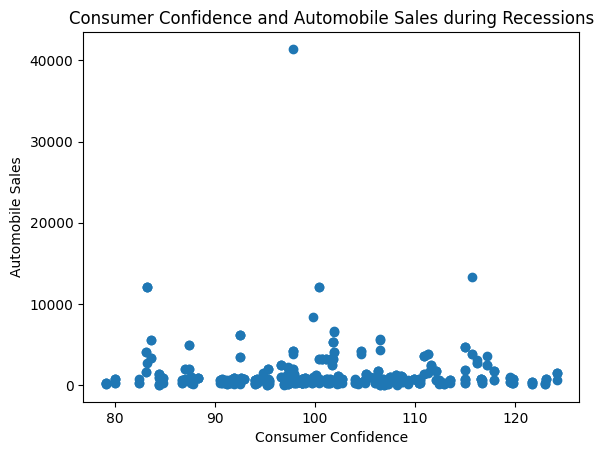

In [ ]:
rec_data = df[df['Recession'] == 1]

plt.scatter(data=rec_data, x='Consumer_Confidence', y='Automobile_Sales')


plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

plt.show()



 ### How does consumer confidence relate to automobile sales during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Vehicle Price and Sales during Recessions'


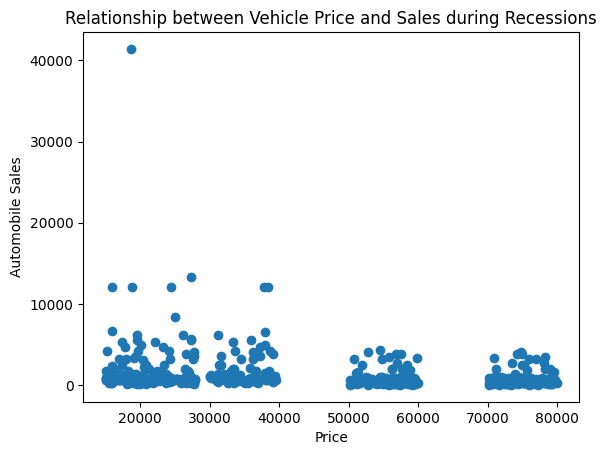

In [ ]:
rec_data = df[df['Recession'] == 1]

plt.scatter(data=rec_data, x='Price', y='Automobile_Sales')


plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Vehicle Price and Sales during Recessions')

plt.show()

----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


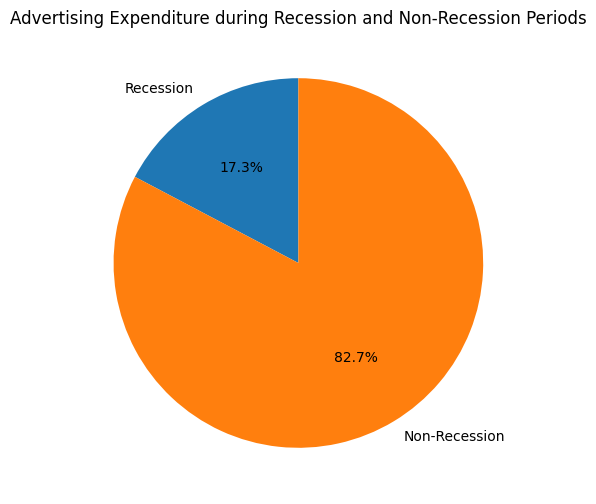

In [ ]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

RAtotal = rec_data['Advertising_Expenditure'].sum()
NRAtotal = non_rec_data ['Advertising_Expenditure'].sum() 


plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 


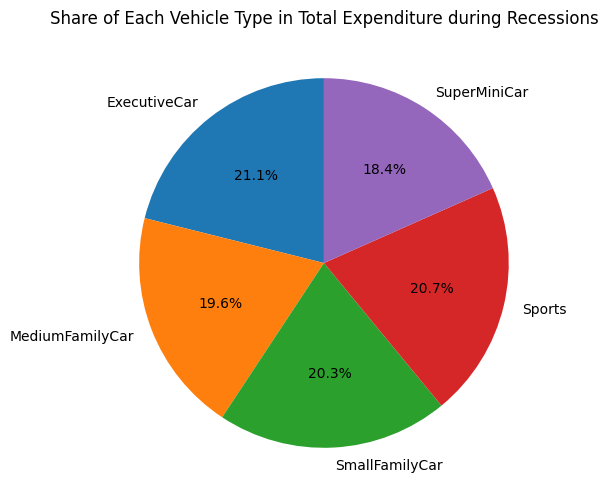

In [ ]:
rec_data = df[df['Recession'] == 1]

advertising = rec_data.groupby('Vehicle_Type')['Recession'].sum()


plt.figure(figsize=(8, 6))

labels = advertising.index
sizes = advertising.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

plt.show()



----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'


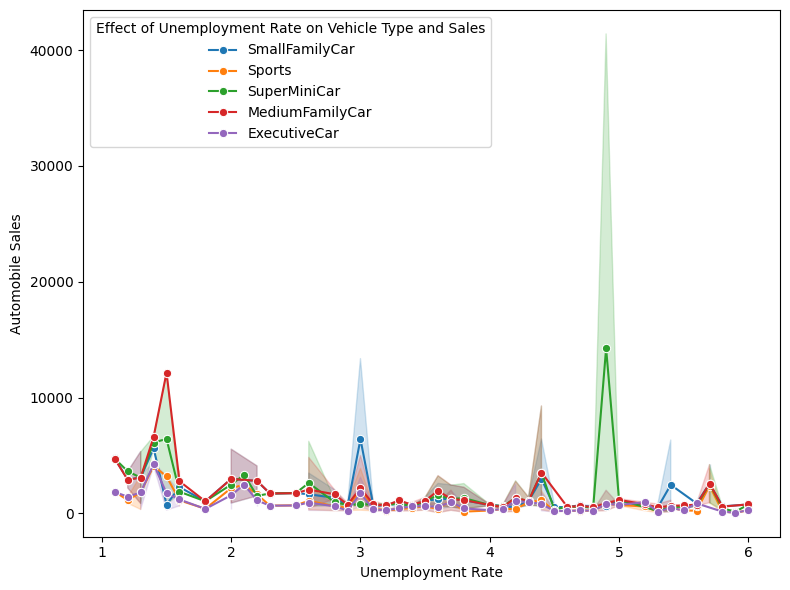

In [ ]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(8, 6))

sns.lineplot(data=rec_data, x = 'unemployment_rate', y = 'Automobile_Sales', hue = 'Vehicle_Type', marker = 'o')


plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title='Effect of Unemployment Rate on Vehicle Type and Sales')

plt.tight_layout()
plt.show()